# SAM index from the CPC 

In [1]:
%matplotlib inline 

In [2]:
from matplotlib import pyplot as plt 

In [3]:
import sys
import pathlib

In [4]:
import numpy as np 
import pandas as pd 

In [5]:
from paleopy import indices

### URL for the CPC monthly SAM index, this one seems to be regularly updated 

see description of the method at [https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/history/method.shtml](https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/history/method.shtml)

To identify the leading teleconnection patterns in the atmospheric circulation, Emperical Orthogonal Function (EOF) was applied to the monthly mean 1000-hPa (**700-hPa**) height anomalies poleward of 20° latitude for the Northern (Southern) Hemisphere. The leading EOF modes capture the maximum amount of explained variance. The **NCEP/NCAR** reanalysis dataset was employed at a horizontal resolution of (lat,lon)=(2.5°X2.5°) for the period 1979 to 2000. The seasonal cycle has been removed from the monthly mean height field. The covariance matrix is used for the EOF analysis. To ensure equal area weighting for the covariance matrix, **the gridded data is weighted by the square root of the cosine of latitude.**

In [6]:
sam = indices.get_CPC_SAM()

In [7]:
sam.head()

,CPC SAM
1979-01-31,0.209
1979-02-28,0.356
1979-03-31,0.899
1979-04-30,0.678
1979-05-31,0.724


In [8]:
sam.tail()

,CPC SAM
2023-01-31,2.304
2023-02-28,0.554
2023-03-31,-0.258
2023-04-30,-0.921
2023-05-31,1.452


<AxesSubplot:>

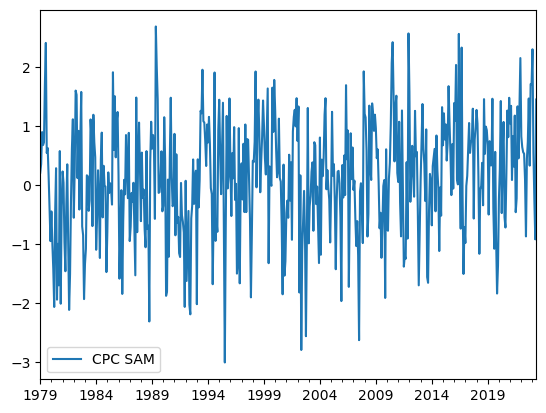

In [9]:
sam.plot()

In [10]:
eof_sam_ncep1 = pd.read_csv('/media/nicolasf/END19101/data/PICT/datasets/Indices/SAM_index_1948_2021_1981_2010_Clim.csv', index_col=0, parse_dates=True)

In [11]:
# eof_sam_ncep2 = pd.read_csv('./tmp_sam_NCEP2.csv', index_col=0, parse_dates=True)

In [12]:
sam.index = sam.index + pd.offsets.MonthBegin(-1)

In [13]:
sam.head()

,CPC SAM
1979-01-01,0.209
1979-02-01,0.356
1979-03-01,0.899
1979-04-01,0.678
1979-05-01,0.724


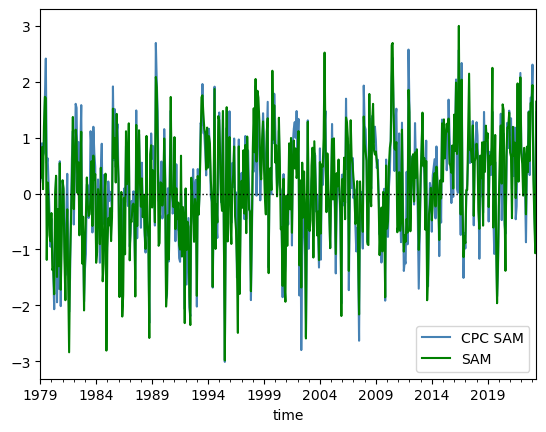

In [14]:
f, ax = plt.subplots()
sam.loc['1979':,:].plot(ax=ax, color='steelblue')
# eof_sam_ncep2.loc['2018':,:].plot(ax=ax, color='coral')
eof_sam_ncep1.loc['1979':,:].plot(ax=ax, color='green')
ax.axhline(0, linewidth=1, color='k', ls=':')
f.savefig('./comparison_CPC_SAM_vs_NCEP_Z700_1979_now.png', dpi=200, bbox_inches='tight', facecolor='w')

### correlation 

In [15]:
pd.concat([sam, eof_sam_ncep1], axis=1).corr()

,CPC SAM,SAM
CPC SAM,1.000000,0.905238
SAM,0.905238,1.000000
